General 

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def year_clean(df, col1_name, col2_name):
    year_cleaned = []
    for _, row in df.iterrows():
        if row[col1_name][-2] in ['0','1','2']:
            year_cleaned.append(2000 + int(row[col1_name][-2:]))
        else:
            year_cleaned.append(1900 + int(row[col1_name][-2:]))
    df[col2_name] = year_cleaned
    return df

# creating dataframes and data cleaning
idols = year_clean(pd.read_csv('kpop_idols.csv'), 'Date of Birth', 'Birth Year')
boys = pd.read_csv('kpop_idols_boy_groups.csv')
girls = pd.read_csv('kpop_idols_girl_groups.csv')
all_groups = year_clean(pd.concat([boys, girls]),'Debut','Debut Year')

# calculating ages of idols
age = [2021-row['Birth Year'] for _, row in idols.iterrows()]
idols['Age'] = age
print(f'{idols.count().Group} artist are or have been in Kpop group')
boy_active = boys.groupby('Active').count()['Name'].loc['Yes']
girl_active = girls.groupby('Active').count()['Name'].loc['Yes']
print(f'{boy_active} boy groups are active')
print(f'{girl_active} girl groups are active')
idols.head(5)

1219 artist are or have been in Kpop group
110 boy groups are active
88 girl groups are active


,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Birth Year,Age
0,A.M,Seong Hyunwoo,성현우,에이엠,12/31/96,Limitless,South Korea,NaN,NaN,M,1996,25
1,Ace,Jang Wooyoung,장우영,에이스,8/28/92,VAV,South Korea,NaN,NaN,M,1992,29
2,Aeji,Kwon Aeji,권애지,애지,10/25/99,Hashtag,South Korea,Daegu,NaN,F,1999,22
3,AhIn,Lee Ahin,이아인,아인,9/27/99,MOMOLAND,South Korea,Wonju,NaN,F,1999,22
4,Ahra,Go Ahra,고아라,아라,2/21/01,Favorite,South Korea,Yeosu,NaN,F,2001,20


International Artists

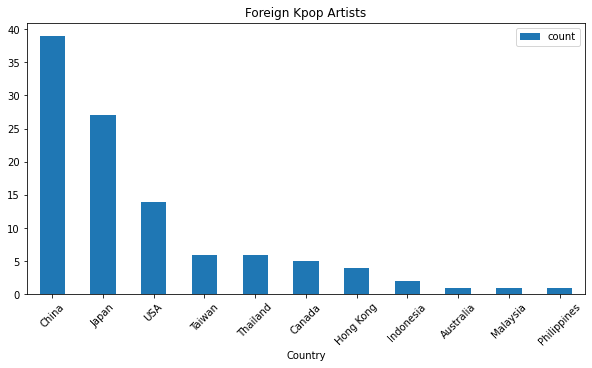

,Country,count
0,China,39
1,Japan,27
2,USA,14
3,Taiwan,6
4,Thailand,6
5,Canada,5
6,Hong Kong,4
7,Indonesia,2
8,Australia,1
9,Malaysia,1


In [28]:
foreign = idols.groupby('Country')['Stage Name'].count().reset_index(name='count')\
.sort_values(['count'],ascending=False).iloc[1:]
foreign.plot.bar(x='Country',title='Foreign Kpop Artists', rot=45, figsize=(10,5))
plt.show()
foreign.reset_index(drop=True, inplace=True)
foreign

Age

The average age of Kpop idols is 25


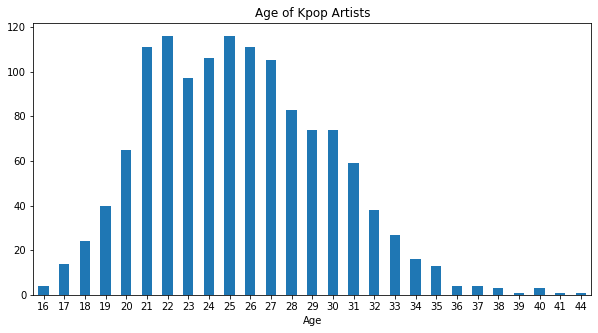

In [29]:
age = idols.groupby('Age')['Stage Name'].count()
print(f'The average age of Kpop idols is {int(np.mean(idols.Age))}')
age.plot.bar(title='Age of Kpop Artists',rot=0, figsize=(10,5))
plt.show()

The average age of a newly debuted Kpop group is 18


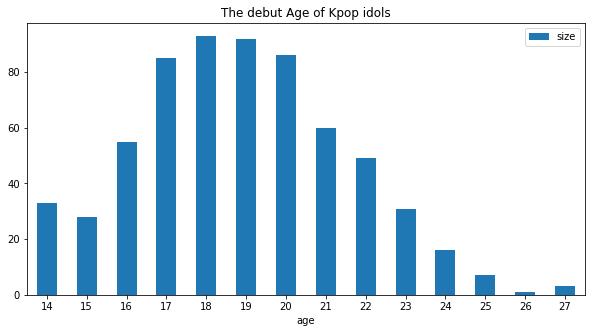

In [30]:
from collections import Counter, defaultdict
def debut_age(df):
    age = []
    checked = []
    for _, group in df.iterrows():
        for index, idol in idols.iterrows():
            if index not in checked and idol.Group == group.Name:
                checked.append(index)
                debut = group['Debut Year'] - idol['Birth Year']
                if debut > 13:
                    age.append(debut)
    return age

debut_age_list = debut_age(all_groups)
debut_age_list.sort()
print(f'The average age of a newly debuted Kpop group is {int(np.mean(debut_age_list))}')
age_count = pd.DataFrame({'age': debut_age_list}).groupby('age', as_index=False).size()
age_count.plot.bar(x='age',y='size',title='The debut Age of Kpop idols',rot=0, figsize=(10,5))
plt.show()

Timeline

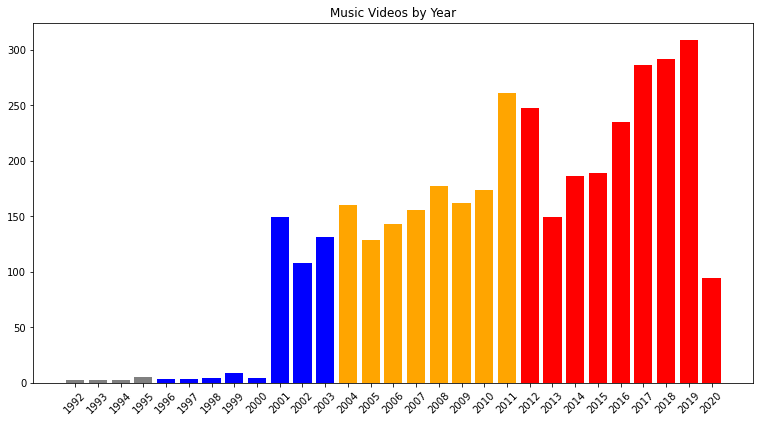

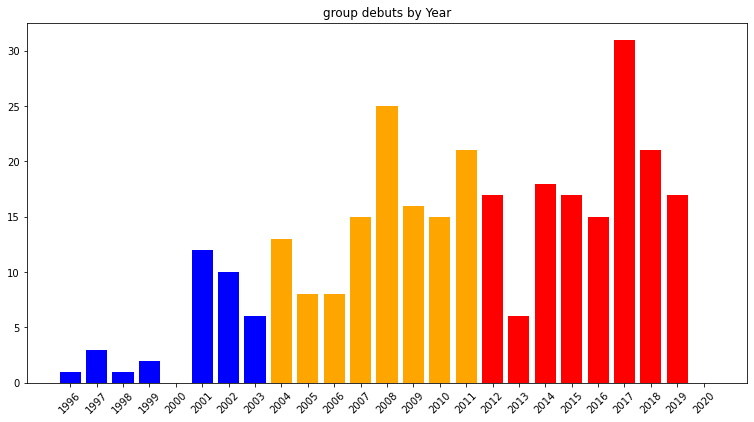

In [31]:
def timeline(df, title_name, column, include_zero):
    zero_gen = list(range(1992,1996))
    first_gen = list(range(1996,2004))
    second_gen = list(range(2004,2012))
    third_gen = list(range(2012,2020))
    
    generations = [zero_gen, first_gen, second_gen, third_gen]
    colors = ['gray','blue','orange','red']

    if include_zero == False:
        generations = generations[1:]
        colors = colors[1:]
    counters = []
    
    for years in generations:
        value_by_year = Counter()
        for _, row in df.iterrows():    
            for year in years:
                if row[column] == year:
                    value_by_year[year] += 1
        counters.append(value_by_year)   
                    
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0,0,1,1])
    all_year = []
    for gen_color, years, counter in zip(colors, generations, counters):
        ax.bar(years, [counter[year] for year in years], color=gen_color)
        all_year += years
    plt.xticks(all_year)
    plt.xticks(rotation = 45)
    plt.title(title_name)
    plt.show()

mv = year_clean(pd.read_csv('kpop_music_videos.csv'),'Date','Year')
timeline(mv, "Music Videos by Year", 'Year', True)
timeline(all_groups, "group debuts by Year", 'Debut Year', False)

Agency

Every Kpop agency manages 1.6 groups on average


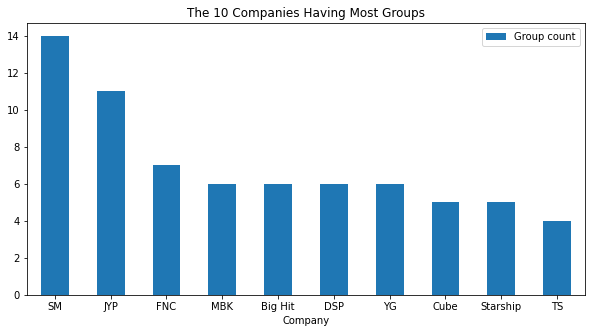

The 10 companies having most groups are:


,Company,Groups,Group count
0,SM,"[EXO, Fly to the Sky, H.O.T, NCT, SHINee, Shin...",14
1,JYP,"[2AM, 2PM, DAY6, g.o.d., GOT7, Stray Kids, 15&...",11
2,FNC,"[CNBLUE, FTISLAND, Honeyst, N.Flying, SF9, AOA...",7
3,MBK,"[1the9, Speed, Turbo, DIA, F-ve Dolls, T-ara]",6
4,Big Hit,"[2AM, 8Eight, BTS, Homme, TXT, GLAM]",6
5,DSP,"[A-JAX, SECHKIES, SS501, April, KARA, Rainbow]",6
6,YG,"[BIGBANG, iKON, SECHKIES, WINNER, 2NE1, BLACKP...",6
7,Cube,"[BtoB, PENTAGON, (G)I-DLE, 4Minute, CLC]",5
8,Starship,"[Boyfriend, CRAVITY, MONSTA X, SISTAR, WJSN]",5
9,TS,"[B.A.P, TRCNG, SECRET, Sonamoo]",4


In [32]:
agency = defaultdict(list)
for _, row in all_groups.iterrows():
    if isinstance(row.Company, str):
        for company in row.Company.split(','):
            agency[company.strip()].append(row.Name)
companies = list(agency.keys())
group_counts = [len(groups) for groups in agency.values()]
agency_df = pd.DataFrame({'Company':companies,"Groups":agency.values(),"Group count":group_counts})
avg_group = round(agency_df['Group count'].mean(),1)
print(f'Every Kpop agency manages {avg_group} groups on average')
big10 = agency_df.sort_values(by='Group count',ascending=False).head(10)
big10.plot.bar(x='Company',y='Group count',title='The 10 Companies Having Most Groups',rot=0, figsize=(10,5))
plt.show()
print(f'The 10 companies having most groups are:')
big10.reset_index(drop=True, inplace=True)
big10

Group Members

Kpop groups have 5.5 members on average
86 groups, about 28%, have lost group members


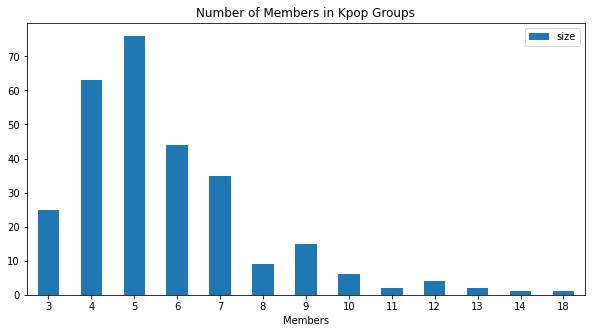

In [33]:
all_groups.astype({'Orig. Memb.': 'int32','Members': 'int32'}).dtypes
print(f'Kpop groups have {round(all_groups.Members.mean(),1)} members on average')

loss = 0
for _, row in all_groups.iterrows():
    if row['Orig. Memb.'] - row['Members'] > 0:
        loss += 1
print(f'{loss} groups, about {int(100*loss/len(all_groups))}%, have lost group members')

member_count = all_groups.groupby('Members', as_index=False).size().iloc[1:]
member_count.plot.bar(x='Members',y='size',title='Number of Members in Kpop Groups',rot=0, figsize=(10,5))
plt.show()

Nationality

In [34]:
import pandas as pd
import plotly.graph_objects as go
idols = pd.read_csv("kpop_idols.csv")
countries = idols.groupby("Country").size().reset_index(name='count')
countries = countries[countries["Country"]!="South Korea"]
countries.sort_values(by=['count'], ascending=False)

,Country,count
2,China,39
5,Japan,27
11,USA,14
9,Taiwan,6
10,Thailand,6
1,Canada,5
3,Hong Kong,4
4,Indonesia,2
0,Australia,1
6,Malaysia,1


In [37]:
fig = go.Figure(data=go.Choropleth(
    locations = countries["Country"],
    locationmode = 'country names',
    z = countries["count"],
    colorscale = 'greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = "Count",
))

fig.update_layout(
    title_x=0.5,
    title_text = "Kpop Stars' nationality other than South Korea",)
fig.show()

In [38]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

df = pd.read_csv('kpop_music_videos.csv')
df.Date = pd.to_datetime(df.Date)
df["Views"]=None
for i, row in df.iterrows():
    df.at[i,"Artist"] = row.Artist.upper()
    try:
        df.at[i,"Views"] = BeautifulSoup(requests.get(row.Video).text, 'lxml').select_one('meta[itemprop="interactionCount"][content]')['content']
    except:
        df.at[i,"Views"] = 0
df.to_csv("mv_views_120721.csv")
df.Date = pd.to_datetime(df.Date)
df.Views = df.Views.astype(int)
df = df[df.Views!=0]
df.shape[0]

3582

<AxesSubplot:title={'center':'Timeline of Kpop music video views on YouTube'}, xlabel='Date', ylabel='100 billion views'>

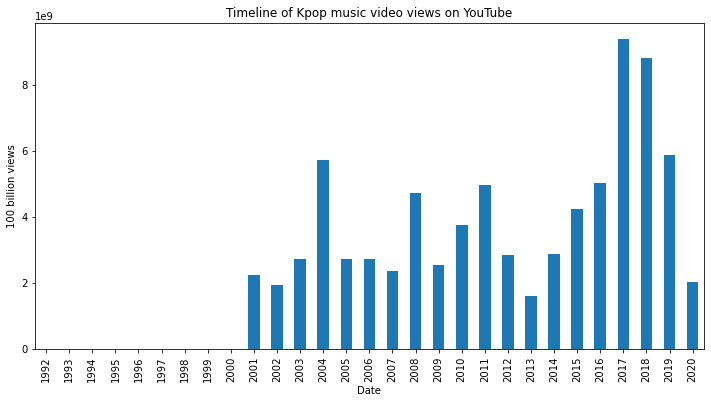

In [39]:
df.groupby(df.Date.dt.year).Views.sum().plot.bar(title = "Timeline of Kpop music video views on YouTube",ylabel="100 billion views")

In [40]:
df.sort_values(by=['Views'],ascending=False).head(10)

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,Views
909,2018-06-15,BLACKPINK,Ddu Du Ddu Du,뚜두뚜두,NaN,https://youtu.be/IHNzOHi8sJs,Girl,Major,1758490818
531,2004-04-19,BLACKPINK,Kill This Love,킬디스러브,NaN,https://youtu.be/2S24-y0Ij3Y,Girl,Major,1461329444
518,2004-12-19,BTS,Boy With Luv feat. Halsey,작은 것들을 위한 시,LUMPENS,https://youtu.be/XsX3ATc3FbA,Boy,Major,1410295820
1296,2017-09-18,BTS,DNA,디엔에이,Lumpens,https://youtu.be/MBdVXkSdhwU,Boy,Major,1380731345
1802,2008-08-16,BLACKPINK,BOOMBAYAH,붐바야,Seo Hyunseung,https://youtu.be/bwmSjveL3Lc,Girl,Major,1322506339
1422,2017-06-22,BLACKPINK,As If It's Your Last,마지막처럼,NaN,https://youtu.be/Amq-qlqbjYA,Girl,Major,1107847700
1202,2017-11-24,BTS,Mic Drop (Steve Aoki Remix),마이크드롭,Woogie Kim,https://youtu.be/kTlv5_Bs8aw,Boy,Major,1097958463
820,2018-08-24,BTS,Idol,아이돌,Lumpens,https://youtu.be/pBuZEGYXA6E,Boy,Major,1043951980
950,2018-05-18,BTS,Fake Love,페이크 러브,Lumpens,https://youtu.be/7C2z4GqqS5E,Boy,Major,1041178765
1745,2010-09-16,BTS,Blood Sweat & Tears,피 땀 눈물,Lumpens,https://youtu.be/hmE9f-TEutc,Boy,Major,820414730


<AxesSubplot:title={'center':'TOP 10 Kpop artists with most music video views on YouTube'}, xlabel='Artist', ylabel='10 billion views'>

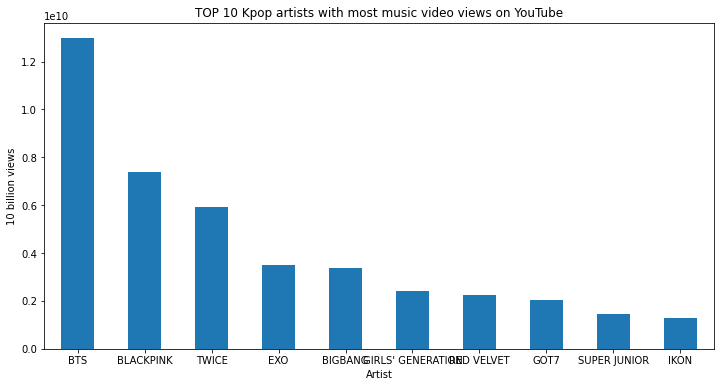

In [41]:
df.groupby(df.Artist)['Views'].sum().sort_values(ascending=False).head(10).plot.bar(rot=0,title="TOP 10 Kpop artists with most music video views on YouTube",ylabel="10 billion views")

Debut
1995    2.0
1996    5.0
1997    4.7
1998    6.0
1999    3.5
2001    5.7
2002    5.3
2003    5.2
2004    7.4
2005    5.9
2006    4.4
2007    4.8
2008    6.2
2009    5.5
2010    6.4
2011    5.4
2012    5.9
2013    7.7
2014    5.4
2015    6.3
2016    5.5
2017    6.7
2018    6.3
2019    5.4
Name: Orig. Memb., dtype: float64

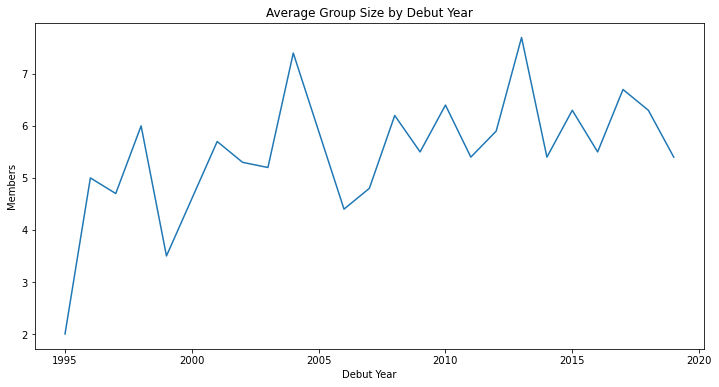

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

boys = pd.read_csv('kpop_idols_boy_groups.csv')
girls = pd.read_csv('kpop_idols_girl_groups.csv')
all_groups = pd.concat([boys, girls])
all_groups.Debut = pd.to_datetime(all_groups.Debut)
all_groups.Debut = [debut.year for debut in all_groups.Debut]
all_groups.Company.replace(to_replace=[''], value=np.nan, inplace=True)
all_groups.Company = all_groups.Company.str.split(", ")
average = round(all_groups.groupby("Debut")['Orig. Memb.'].mean(),1)
average.plot(title="Average Group Size by Debut Year", ylabel="Members", xlabel="Debut Year")
average